# Principal Component Analysis (PCA) and Singular Value Decomposition (SVD)




## PCA
Principal Component Analysis (PCA) is a widely used dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining as much variance as possible. It is commonly used in data compression, noise reduction, and feature extraction for machine learning and statistical applications.

The key idea behind PCA is to find a new coordinate system where the axes (called principal components) correspond to the directions of maximum variance in the data.

Given a dataset with $n$ observations and $d$ features, PCA aims to project the data onto a lower-dimensional space by finding a set of orthogonal basis vectors (principal components)

### Step 1: Standardization

Since PCA is sensitive to the scale of variables, it is standard practice to standardize the dataset before applying PCA. This ensures that all features contribute equally to the analysis.
For each feature $x_{ij}$ the standardized value is given by:

$$
z_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
$$

- $\bar{x}_j$ is the mean of feature $j$,
- $s_j$ is the standard deviation of feature $j$.



### Step 2: Covariance Matrix Computation
After standardization, we compute the covariance matrix, which captures the relationships between the features.

$$
\Sigma = \frac{1}{n-1} \sum_{i=1}^{n} (z_i - \bar{z})(z_i - \bar{z})^T
$$

where $z_i$ is the $ i^{th}$ standardized data, $\bar{z}$ is the mean vector of standardized data, and $n$ is the number of data points.

$$
C =
\begin{bmatrix}
\text{cov}(x,x) & \text{cov}(x,y) & \text{cov}(x,z) \\
\text{cov}(y,x) & \text{cov}(y,y) & \text{cov}(y,z) \\
\text{cov}(z,x) & \text{cov}(z,y) & \text{cov}(z,z)
\end{bmatrix}
$$



### Step 3: Compute the Eigenvectors and Eigenvalues of the Covariance Matrix

This step involves computing the eigenvectors and corresponding eigenvalues of the covariance matrix. The eigenvectors determine the directions of the new feature space, and the eigenvalues determine their magnitude.

$$
\Sigma v = \lambda v
$$

where $v$ is the eigenvector, and $\lambda$ is the corresponding eigenvalue.


### Step 4: Select top $k$ Principal Components

To reduce dimensionality, we select the top $ k $ eigenvectors corresponding to the largest eigenvalues. This results in a projection matrix $ \mathbf{W} $ of size $ d \times k $:

$$
\mathbf{W} = [\mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_k]
$$

where $ k $ is the number of principal components chosen.


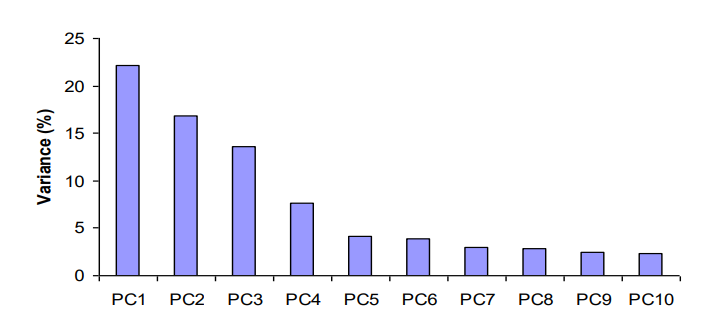

### Step 5: Projection onto the new Feature Space

Finally, we transform the original dataset **𝓧** onto the new subspace:

$$
\mathbf{Z} = \mathbf{X} \mathbf{W}
$$

where:

- $Z$ is the transformed dataset with reduced dimensionality $ n \times k $,
- The original data is now represented in a lower-dimensional space while retaining most of the variance.

### Apply PCA on California Housing Dataset

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler # For data standardization
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### **California Housing Dataset**

The **California Housing Dataset** is a widely used dataset in machine learning, primarily for **regression tasks**. It contains information on housing prices in various districts of **California** based on data collected from the **1990 U.S. Census**. The dataset is commonly used for predicting **median house values** based on various **socioeconomic** and **geographic** features.

---

###### **1. Dataset Overview**
- **Objective**: Predict the **median house value** in a district based on various features.
- **Number of Instances**: **20,640**
- **Number of Features**: **8** numerical attributes (excluding the target variable).
- **Target Variable**: **Median house value** (in $100,000 units).

---

###### **2. Features Description**
Each row in the dataset represents a **block group** (a small district) in California, with the following attributes:

| **Feature Name**  | **Description** |
|------------------|---------------|
| `MedInc`        | Median income of households in block group (in tens of thousands of dollars). |
| `HouseAge`      | Median age of houses in the block group. |
| `AveRooms`      | Average number of rooms per household. |
| `AveBedrms`     | Average number of bedrooms per household. |
| `Population`    | Total population in the block group. |
| `AveOccup`      | Average number of occupants per household. |
| `Latitude`      | Latitude coordinate of the block group. |
| `Longitude`     | Longitude coordinate of the block group. |

- The **target variable** (`MedHouseVal`): Median house value for households in the block group (in $100,000 units).


In [2]:
# Load the california housing dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
print(df.columns)
data = df.to_numpy()


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


#### Visualization of the data e.g. *correlation matrices*, *scatterplots*, something else

In order to visualize the data from the California Housing Dataset, we will first use a **correlation heatmap** and then **histograms **for each variable. The correlation heatmap will reveal the relationships between the variables, while the histograms will allow us to observe the distribution of values for each variable.

By analyzing the correlation heatmap, we can identify how strongly each variable is related to the others. On the other hand, the histograms will help us understand the variation and spread of the values for each feature.

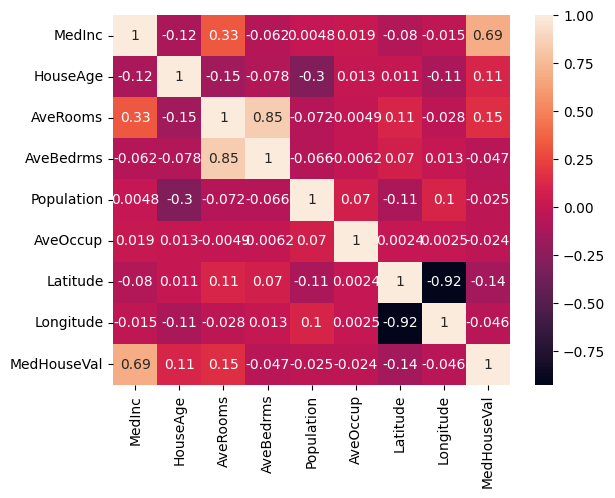

In [3]:
dataplot=sns.heatmap(df.corr(), annot=True)

The above diagram indicates that the variables with the highest correlation between them are latitude and longitude, specifically showing an anti-correlation.

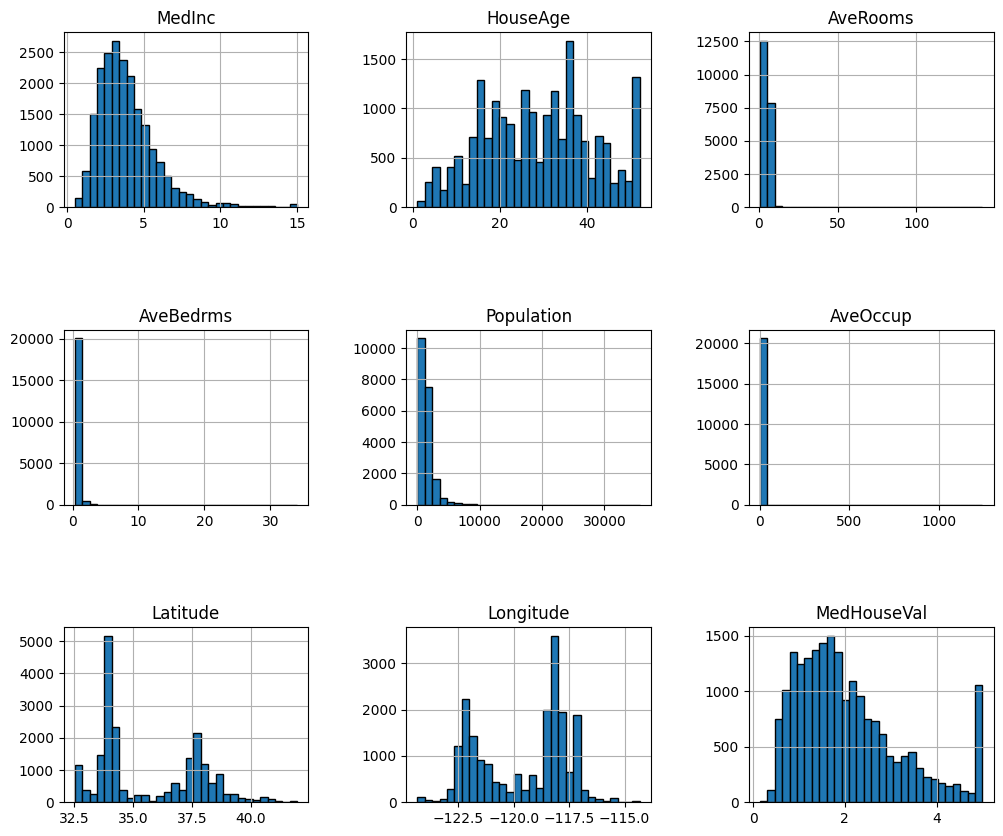

In [4]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

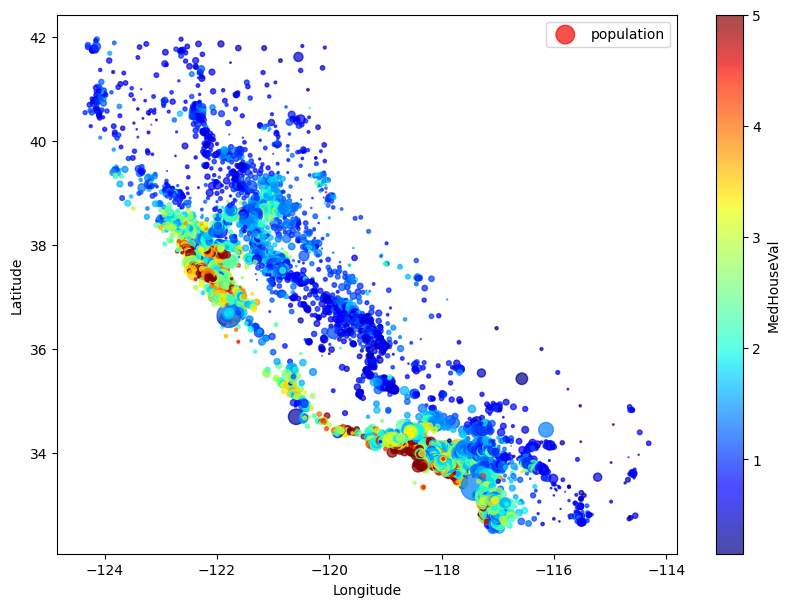

In [5]:
df.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['Population']/100, label="population", alpha=0.7)
plt.show()

Finally, the above **scatter plot** was created, which represents the **map of California**, with the **color map** corresponding to **housing prices** and the **circle radius** representing the **population of the areas**.

Based on this diagram, we can conclude that:
- **Housing prices are higher near the coastline**.  
- **Homes in areas with higher population density tend to be more expensive**, with this effect diminishing as we move further away from the coast.  
- Additionally, there appear to be some **outliers** in the data.


To obtain more **robust results** in the methods that will be used later in the exercise, we will perform **standardization** of the data.

Below are the tables displaying the **values of the variables before and after standardization**.


In [6]:
pd.DataFrame(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
standard_scaler = StandardScaler()
standarized_data = standard_scaler.fit_transform(df)
pd.DataFrame(standarized_data, columns=df.columns)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


####Perform PCA to reduce the number of features

At this point, we will isolate the target value in the variable y and perform PCA on the dataset X, which includes all variables except the target value.

This separation will be maintained throughout all subsequent questions in this tutorial.

In [8]:
# Isolate the target value
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [9]:
standardized_X = standard_scaler.fit_transform(X) # Standardization of the data

We apply the PCA method using the PCA function from the sklearn library.

In [10]:
pca = PCA()
pca_data = pca.fit_transform(standardized_X) # Apply PCA

#### Provide scatterplots for the case of projections in 2 and 3 dimensions

Below, we visualize the **projection of the data** onto **2 Principal Components (2D scatter plot)** and **3 Principal Components (3D scatter plot)**.

Through these **scatter plots of the Principal Components (PCs)**, we can observe how the data points are projected onto the PCs and how they are distributed in this lower-dimensional space.

These visualizations help in understanding the **structure of the data**, revealing potential **patterns, relationships, and possible clusters** that the data may form.


In [11]:
pca_2 = PCA(n_components=2)
pca_data_2= pca_2.fit_transform(standardized_X) #projection in 2 PCs
print(pca_data_2)

[[ 1.88270434 -0.50336186]
 [ 1.37111955 -0.12140565]
 [ 2.08686762 -0.5011357 ]
 ...
 [ 1.40235696 -1.09642559]
 [ 1.5429429  -1.05940835]
 [ 1.40551621 -0.89672727]]


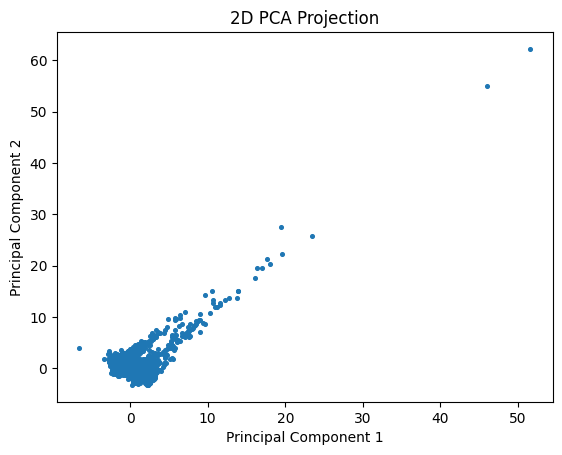

In [12]:
plt.scatter(pca_data_2[:, 0], pca_data_2[:, 1], s=7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()

The above diagram does not reveal any specific **pattern** or the formation of **clusters** in the data, as most points are concentrated near the origin of the axes.

However, we observe that the points are positioned around the line **y = x** (approximately), which suggests that the **first two Principal Components (PCs)** capture a similar proportion of the **variance** in the data.


In [13]:
pca_3 = PCA(n_components=3)
pca_data_3= pca_3.fit_transform(standardized_X) #projection in 3 PCs
print(pca_data_3.shape)

(20640, 3)


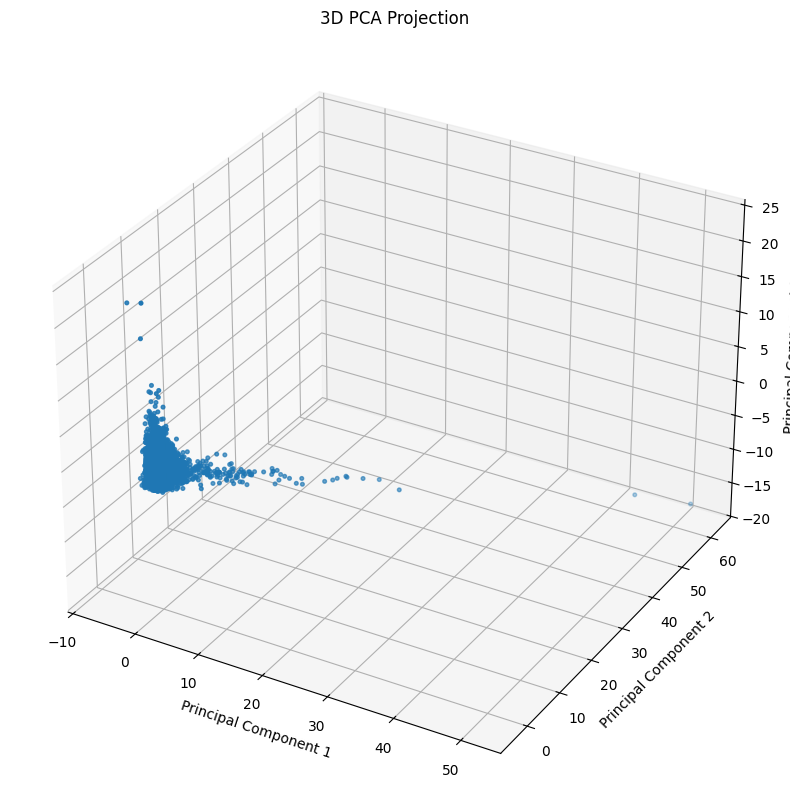

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data_3[:, 0], pca_data_3[:, 1], pca_data_3[:, 2], s=7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Projection')
plt.show()

Similarly to the **2D scatter plot**, no clear **pattern** or **cluster formation** is observed in this case.

Most of the data points are once again **concentrated near the origin** of the axes.


#### Perform linear regression using the original data

Linear regression is performed using the **LinearRegression()** function from the **sklearn** library.

Below, we apply it to the **original standardized data**.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

#### Perform linear regression using PCA-reduced features

In this step, the **Linear Regression method** is applied to the **projection of the data onto the first two Principal Components (PCs)**.


In [16]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_data_2, y, test_size=0.2, random_state=42)
reg_pca = LinearRegression()
reg_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

#### Compare the performance of linear regression on the original vs the PCA features

In this step, we will evaluate the **performance of the Linear Regression method** on the **original data** compared to its application on the **PCA features**.

The evaluation metric used will be **R-squared**, which is defined as follows:

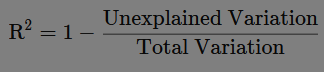

R-squared is a **statistical metric** that represents the **proportion of the variance** in a **dependent variable** that is explained by an **independent variable** in a regression model.


In [17]:
y_pred = reg.predict(X_test)
y_pred_pca = reg_pca.predict(X_test_pca)
r2 = r2_score(y_test, y_pred) #R-squared for regression in original data
r2_pca = r2_score(y_test_pca, y_pred_pca) #R-squared for regression in thw first two PCs
print("R-squared score:", r2)
print("R-squared score - PCA:", r2_pca)

R-squared score: 0.5757877060324511
R-squared score - PCA: 0.01316976289846139


As shown in the above cell output, the **R-squared** value is significantly **higher** when the **Linear Regression method** is applied to the **original data**.

However, it is important to emphasize that, in this case, the **data projection** has only been performed on **2 Principal Components**.

In the next step, we will examine whether the **evaluation metric improves** when using a **different number of Principal Components**.


#### Quantify the impact of the number of principal components on the regression

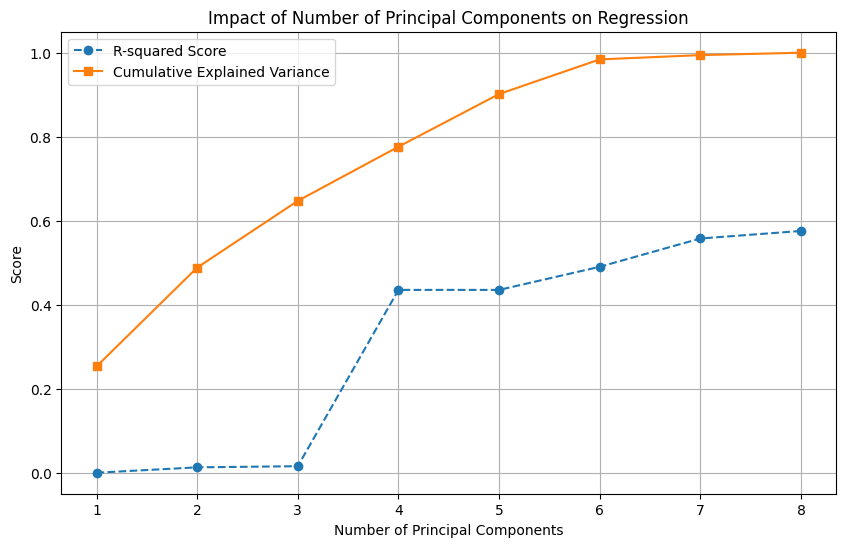

In [18]:
# Compute cumulative explained variance
pca_full = PCA().fit(standardized_X)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Store R-squared scores for different numbers of principal components
r2_scores = []

# Compute R-squared for different numbers of principal components
for n_components in range(1, X.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(standardized_X)

    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    reg_pca = LinearRegression()
    reg_pca.fit(X_train_pca, y_train_pca)

    y_pred_pca = reg_pca.predict(X_test_pca)

    r2_pca = r2_score(y_test_pca, y_pred_pca)
    r2_scores.append(r2_pca)

# Plot the impact of the number of Principal Components on R-squared score
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), r2_scores, marker='o', linestyle='--', label="R-squared Score")
plt.plot(range(1, X.shape[1] + 1), cumulative_explained_variance, marker='s', linestyle='-', label="Cumulative Explained Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Impact of Number of Principal Components on Regression')
plt.legend()
plt.grid(True)
plt.show()


## SVD

Singular Value Decomposition (SVD) is a **matrix factorization technique** used in linear algebra. It decomposes any real or complex matrix $M$ ($ m \times n $) into three matrices:

$$
\mathbf{M} = \mathbf{U} \Sigma \mathbf{V}^T
$$

where:
- $U$: An $ m \times m $ orthonormal matrix (left singular vectors).
- $ \Sigma $: An $ m \times n $ diagonal matrix containing the **singular values**.
- $V$: An $ n \times n $ orthonormal matrix (right singular vectors).

SVD is widely used in **dimensionality reduction, image compression, and Principal Component Analysis (PCA)**.

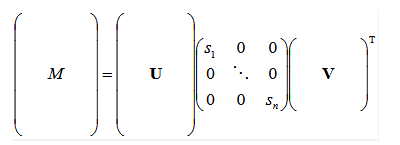

### **How to calculate the SVD of a matrix**

### **Step 1: Calculate Eigenvalues and Eigenvectors**  
Compute the eigenvalues and eigenvectors of $M^T M$ and $M M^T$. These will provide the squared singular values and the right and left singular vectors, respectively.

### **Step 2: Singular Values**  
The non-zero eigenvalues of $M^T M$ (or $M M^T$) are the squares of the singular values of **M**. Extract the square roots of these eigenvalues to obtain the singular values, which are placed on the diagonal of the $\Sigma$ matrix.

### **Step 3: Right Singular Vectors**  
The right singular vectors of **M** are the eigenvectors of $M^T M$. These vectors form the columns of the **V** matrix.

### **Step 4: Left Singular Vectors**  
Similarly, the left singular vectors of **M** are the eigenvectors of $M M^T$. These vectors form the columns of the **U** matrix.

### **Step 5: Construct** $U$, $\Sigma$, **and** $V$  
With the singular values and singular vectors, you can construct the matrices **U**, $\Sigma$, and **V**. The matrix $\Sigma$ should be the same size as **M**, with singular values on the diagonal and zeros elsewhere.

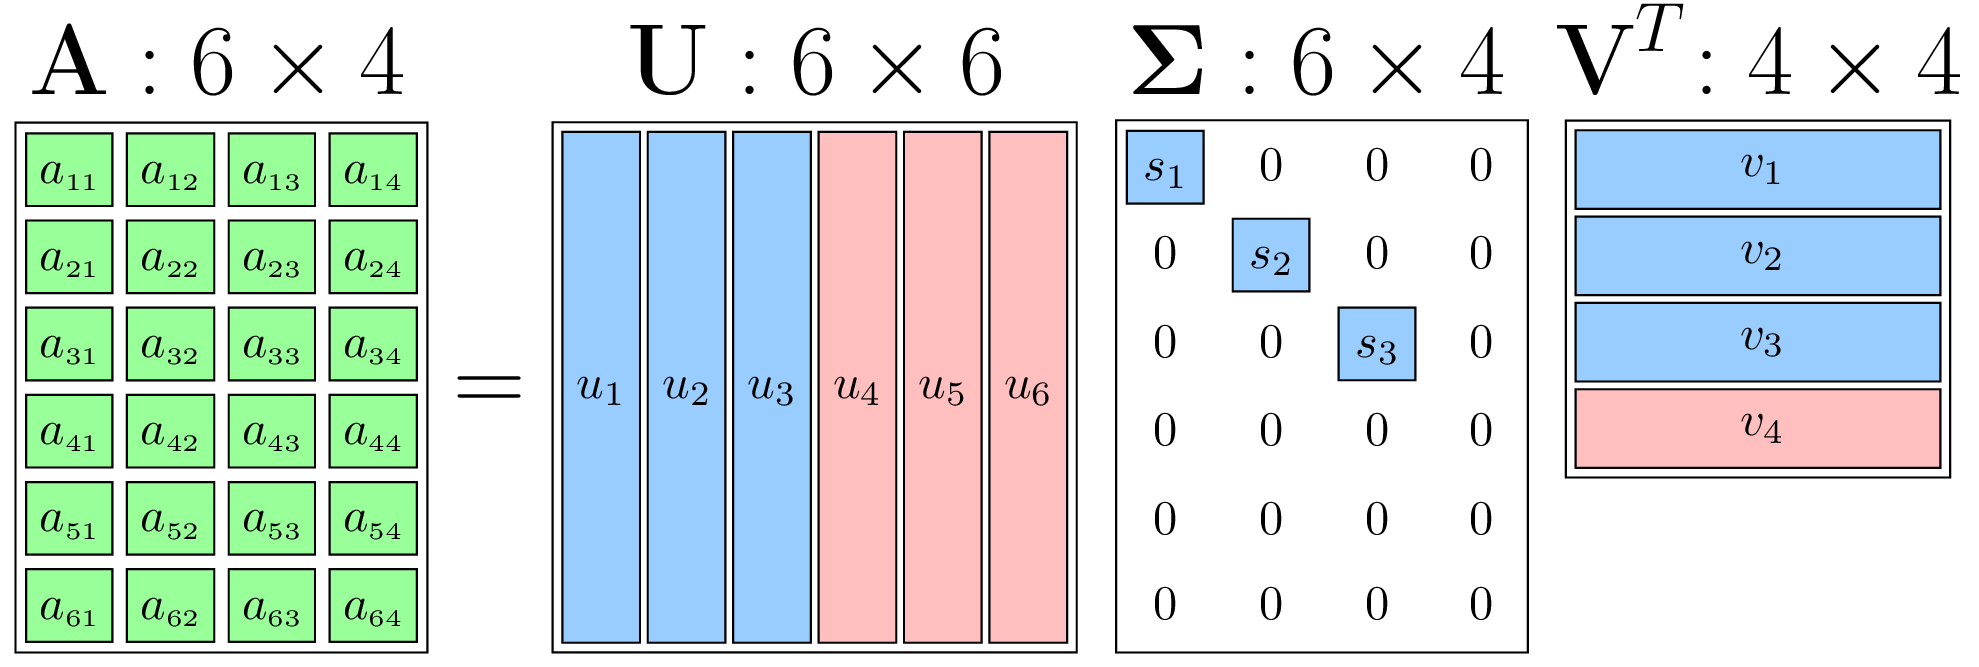

### SVD in image reconstruction

In this task, we will apply **Singular Value Decomposition (SVD)** for **image reconstruction**. The goal is to approximate an image using a reduced number of singular values, which allows us to achieve compression while retaining as much detail as possible. By selecting only a subset of the largest singular values, we reconstruct an approximation of the original image with varying levels of accuracy. This process highlights how much information is contained within the most significant singular values and how reducing them affects image quality.

In [19]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import color
from sklearn.utils.extmath import randomized_svd
import os
from PIL import Image


In [20]:
# Load and preprocess the image
def load_image(image_path, gray=True):
    image = cv2.imread(image_path)
    if gray:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image / 255.0  # Normalize pixel values
    return image

- The function `svd_reconstruct(image, num_components)` takes an image as input, performs SVD, and reconstructs the image using only the first `num_components` singular values.  
- First, it decomposes the image into three matrices: $ U, \Sigma, V^T $.  
- Then, it selects only the top `num_components` singular values from $ \Sigma $ and the corresponding vectors from $ U $ and $V^T $.  
- Finally, the reconstructed image is obtained by multiplying these reduced matrices back together.  
- The fewer singular values we use, the more compressed the image becomes, but at the cost of losing finer details.  

In [21]:
# Perform SVD and reconstruct the image
def svd_reconstruct(image, num_components):
    U, Sigma, VT = np.linalg.svd(image, full_matrices=False)
    Sigma_diag = np.diag(Sigma[:num_components])
    reconstructed = U[:, :num_components] @ Sigma_diag @ VT[:num_components, :]
    return reconstructed, Sigma, U, VT

In [22]:
# Plot singular values
def plot_singular_values(Sigma):
    plt.figure(figsize=(8, 5))
    plt.plot(Sigma, marker='o', linestyle='-')
    plt.xlabel("Singular Value Index")
    plt.ylabel("Singular Value Magnitude")
    plt.title("Singular Values of the Image")
    plt.grid()
    plt.show()

The cumulative energy of the singular values helps us understand how much of the total information is retained when using a given number of singular values. The cumulative energy plot shows how quickly the total energy accumulates, indicating how many singular values are necessary to retain a significant portion of the image's structure. Typically, the first few singular values contribute the most, while the remaining values add only minor refinements.

In [23]:
# Plot cumulative energy of singular values
def plot_cumulative_energy(Sigma):
    cumulative_energy = np.cumsum(Sigma) / np.sum(Sigma)

    plt.figure(figsize=(8, 5))
    plt.plot(cumulative_energy, marker='o', linestyle='-')
    plt.xlabel("Number of Singular Values")
    plt.ylabel("Cumulative Energy")
    plt.title("Cumulative Energy of Singular Values")
    plt.axhline(y=0.90, color='r', linestyle='--', label='90% Energy')
    plt.axhline(y=0.95, color='g', linestyle='--', label='95% Energy')
    plt.legend()
    plt.grid()
    plt.show()

The function that performs image reconstruction at multiple levels of compression allows us to visually compare how different numbers of singular values affect the quality of the reconstructed image. By using different values such as 5, 10, 20, 30, 50, and 100 singular values, we can observe how the image gradually improves in clarity as more components are included.

In [24]:
# Save reconstructed images with different numbers of components
def save_reconstructed_images(image, Sigma, U, VT, components_list, output_dir="svd_images"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for num_components in components_list:
        Sigma_diag = np.diag(Sigma[:num_components])
        reconstructed = U[:, :num_components] @ Sigma_diag @ VT[:num_components, :]
        filename = f"{output_dir}/reconstructed_{num_components}.jpg"
        Image.fromarray((reconstructed * 255).astype(np.uint8)).save(filename)

    print("Reconstructed images saved in:", output_dir)

In [25]:
# Display multiple reconstructions side by side
def plot_multiple_reconstructions(image, Sigma, U, VT, components_list):
    fig, axes = plt.subplots(1, len(components_list) + 1, figsize=(15, 5))

    # Original Image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Reconstructed Images
    for i, num_components in enumerate(components_list):
        Sigma_diag = np.diag(Sigma[:num_components])
        reconstructed = U[:, :num_components] @ Sigma_diag @ VT[:num_components, :]

        axes[i + 1].imshow(reconstructed, cmap='gray')
        axes[i + 1].set_title(f"{num_components} Components")
        axes[i + 1].axis("off")

    plt.show()

In [26]:
# Example usage
image_path = "cat.jpg"  # Change this to your image path
image = load_image(image_path)

# Perform SVD
_, Sigma, U, VT = svd_reconstruct(image, num_components=len(image))

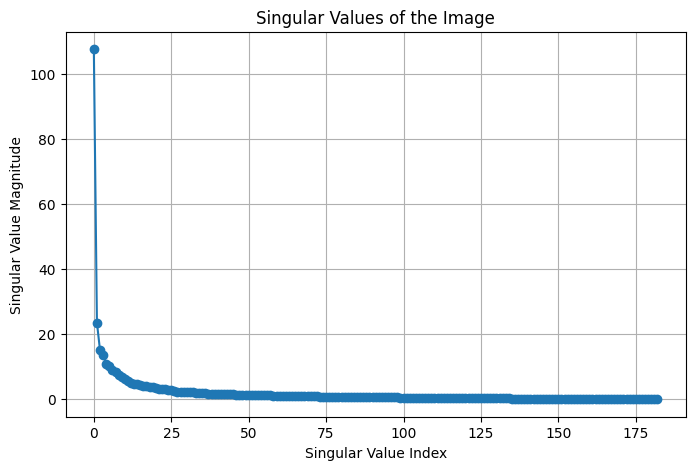

In [27]:
# Plot results
plot_singular_values(Sigma)


The singular values plot shows that the first few singular values are significantly larger than the rest, which means that most of the image’s structural information is concentrated in just a small number of components. As we move towards higher singular value indices, their contribution decreases rapidly, indicating that additional singular values contribute less to the overall image representation.

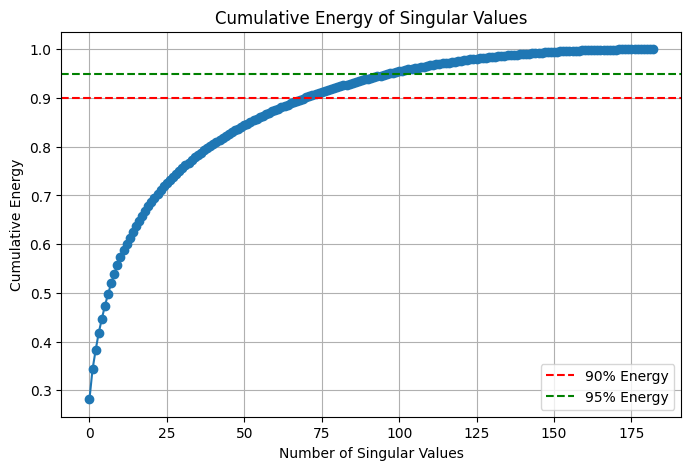

In [28]:
plot_cumulative_energy(Sigma)

The cumulative energy plot further reinforces this observation by showing that energy accumulates quickly within the first few singular values. For example, reaching 90% or 95% of the total energy often requires only a fraction of all available singular values. The red and green dashed lines in the plot help visualize where these thresholds are reached. If we use only enough singular values to surpass the 90% energy mark, we can achieve significant compression while maintaining high image quality.

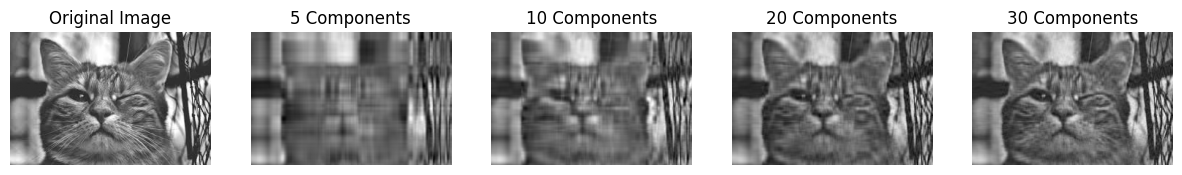

In [29]:
# Show multiple reconstructed images
components_list_1 = [5, 10, 20, 30]  # Different numbers of singular values to test
plot_multiple_reconstructions(image, Sigma, U, VT, components_list_1)

At very low values (e.g., 5–10), the image appears blurry and lacks detail. Around 20–30 components, the general structure of the image becomes clear, but some finer details are still missing. With 50 or more components, the reconstruction is nearly indistinguishable from the original, demonstrating that a relatively small number of singular values can be sufficient for high-quality reconstruction.

In [30]:
# Save multiple reconstructions
components_list_2 = [5, 10, 20, 30, 50, 100]  # Different numbers of singular values to test
save_reconstructed_images(image, Sigma, U, VT, components_list_2)

Reconstructed images saved in: svd_images


Reducing the number of singular values not only affects image clarity but also directly impacts storage size. Since each singular value corresponds to a portion of the image’s structure, using fewer singular values means we store less data. This compression can be useful in applications where storage efficiency is important, such as reducing the memory footprint of large datasets. However, fewer singular values also mean lower image quality, so a balance must be found between compression and visual fidelity.